In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

In [2]:
type_colors = {'all':'k','main':'#fc8d62','asso':'#66c2a5','new':'grey'}

In [3]:
key_data = pd.read_csv('Key_data.csv')

In [4]:
key_data.head(5)

,index_i,mentee_id,mentor_id,community,paper_num_mte,paper_num_mto,paper_ratio_mte,paper_ratio_mto,credit_mte,credit_mto,...,total_cits_mte,total_cits_mto,total_cits5_mte,total_cits5_mto,cits_mte,cits_mto,cits5_mte,cits5_mto,birthYear_mte,birthYear_mto
0,0,A1964335128,A177689540,5.0,0,26,0.000000,1.0,0.000000,96.139683,...,7237.0,21415.0,4403.0,5485.0,0.0,1996.0,0.0,673.0,2004,1956
1,0,A1964335128,A177689540,3.0,0,42,0.000000,1.0,0.000000,150.796825,...,7237.0,21415.0,4403.0,5485.0,0.0,1276.0,0.0,264.0,2004,1956
2,0,A1964335128,A177689540,6.0,25,0,1.000000,0.0,523.366667,0.000000,...,7237.0,21415.0,4403.0,5485.0,4163.0,0.0,2469.0,0.0,2004,1956
3,0,A1964335128,A177689540,1.0,0,62,0.000000,1.0,0.000000,175.473810,...,7237.0,21415.0,4403.0,5485.0,0.0,5142.0,0.0,806.0,2004,1956
4,0,A1964335128,A177689540,0.0,8,107,0.074766,1.0,132.846429,724.462374,...,7237.0,21415.0,4403.0,5485.0,1817.0,8735.0,795.0,2880.0,2004,1956


In [5]:
key_data.columns

Index(['index_i', 'mentee_id', 'mentor_id', 'community', 'paper_num_mte',
       'paper_num_mto', 'paper_ratio_mte', 'paper_ratio_mto', 'credit_mte',
       'credit_mto', 'communitys_paper_num_mto', 'communitys_paper_num_mte',
       'total_credit_mte', 'total_credit_mto', 'type', 'total_cits_mte',
       'total_cits_mto', 'total_cits5_mte', 'total_cits5_mto', 'cits_mte',
       'cits_mto', 'cits5_mte', 'cits5_mto', 'birthYear_mte', 'birthYear_mto'],
      dtype='object')

3395


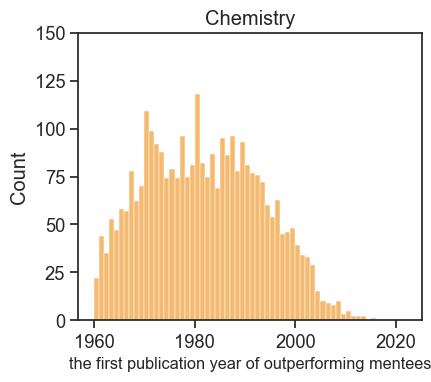

In [7]:
test = key_data[['mentee_id','total_cits5_mte']].drop_duplicates()
q10,q25,q50,q80,q95 = test['total_cits5_mte'].quantile([.1,.25,.5,.80,.95])
surpasser_elites_80 = key_data[['mentee_id','mentor_id']][(key_data.total_cits5_mte>=q80)
                                                         &(key_data.total_credit_mte>=key_data.total_credit_mto)].drop_duplicates().values[:,0]                                                                                                            
V0_elite = surpasser_elites_80
print(len(set(V0_elite)))
t_test = key_data[['mentee_id','birthYear_mte']][key_data.mentee_id.isin(V0_elite)].drop_duplicates()

# 生成示例数据
# data = np.random.randn(1000)  # 生成1000个符合正态分布的随机数
data = t_test.birthYear_mte
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.7*6,0.618*6])
sns.set(style='ticks',font_scale=1.2, font='Arial')
# 使用Seaborn绘制直方图
sns.histplot(data, bins=62, binrange=[1960,2022],ax=ax,color='#f1a340')  # kde=True 选项用于绘制核密度估计曲线

# 添加标题和标签
plt.ylabel('Count')
plt.xlabel('the first publication year of outperforming mentees',fontsize=11.7)
plt.title('Chemistry')

# 显示图表
plt.ylim([0,150])

fig.savefig('SI/the first publication year of elites(fig5).pdf')

#### Scatter plot

#### threshold

In [6]:
threshold = 0.0

In [7]:
q10,q25,q50,q75,q95 = key_data['total_cits5_mte'].drop_duplicates().quantile([.1,.25,.5,.75,.95])
surpasser_elites = key_data[['mentee_id','mentor_id']][(key_data.total_cits5_mte>=q95)
                                             &(key_data.total_credit_mte>=key_data.total_credit_mto)].drop_duplicates().values[:,0]

In [8]:
data_elites = key_data[['mentee_id','mentor_id','credit_mte','credit_mto','paper_ratio_mte','paper_ratio_mto','type']][key_data.mentee_id.isin(surpasser_elites)
                                                                                                     &(key_data.total_credit_mte>=key_data.total_credit_mto)
                                                                                                    &(key_data.type!='new')
                                                                                                    &(key_data.paper_ratio_mto>=threshold)]
                                                                                                                    

In [9]:
data_elites['credit_gap'] = data_elites['credit_mte'] - data_elites['credit_mto']

In [10]:
data_elites

,mentee_id,mentor_id,credit_mte,credit_mto,paper_ratio_mte,paper_ratio_mto,type,credit_gap
366,A2108507189,A2081302104,1649.960084,69.332143,0.864000,0.136000,associate,1580.627942
367,A2108507189,A2081302104,3449.052609,1.000000,0.989247,0.010753,associate,3448.052609
368,A2108507189,A2081302104,186.282540,0.500000,0.961538,0.038462,associate,185.782540
369,A2108507189,A2081302104,184.733333,162.100000,0.714286,0.500000,associate,22.633333
370,A2108507189,A2081302104,0.250000,1221.703571,0.006452,0.993548,main,-1221.453571
...,...,...,...,...,...,...,...,...
234805,A578343829,A2632925417,431.083333,401.800000,0.609589,0.390411,main,29.283333
234807,A578343829,A2632925417,6195.590517,10.000000,0.996564,0.003436,associate,6185.590517
235362,A203580725,A2313967077,193.133525,1.000000,0.991870,0.008130,associate,192.133525
235363,A203580725,A2313967077,15.666667,369.633333,0.051852,1.000000,main,-353.966667


In [11]:
def main_asso_gap(tp_df):
    main_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='main'])
    if len(main_gap)>0:
        bigger0 = main_gap[main_gap.credit_gap>=0]
        if len(bigger0)>0:
            main_output = bigger0.values.tolist()[0][0]
        else:
            main_output = main_gap.values.tolist()[0][0]
    else:
        main_output = -100 # the average main_gap in data_elites
        
    asso_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='associate'])
    if len(asso_gap)>0:
        bigger0 = asso_gap[asso_gap.credit_gap>=0]
        if len(bigger0)>0:
            asso_output = bigger0.values.tolist()[0][0]
        else:
            asso_output = asso_gap.values.tolist()[0][0]
    else:
        asso_output = 'no asso topic'
        
    return main_output,asso_output

In [12]:
main_asso_gap = data_elites.groupby(['mentee_id','mentor_id']).apply(main_asso_gap).reset_index(name='main_asso_gap')

df_list = []
tp_array = main_asso_gap.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)

main_asso_gap = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main_gap','asso_gap'])
main_asso_gap = main_asso_gap[main_asso_gap.asso_gap!='no asso topic']
main_asso_gap_elites = main_asso_gap

In [13]:
len(main_asso_gap)

479

In [14]:
# sns.set(style='ticks', font_scale=1.2, font='Arial')
# fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True) #, constrained_layout=True

# sns.scatterplot(data=main_asso_gap_elites, x="main_gap", y="asso_gap",color='#998ec3',
#                ax=ax)

# ax.set_xscale('symlog')
# ax.set_yscale('symlog')
# # ax.set(xlim=[-1000,1000],ylim=[-1000,1000])
# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlim(-10**4,10**4)
# plt.ylim(-10**4.,10**4.)
# ax.xaxis.set_minor_locator(MultipleLocator(1000))
# ax.yaxis.set_minor_locator(MultipleLocator(1000))

# ax.axvline(x=0,ls='--',color=type_colors['asso'])
# ax.axhline(y=0,ls='--',color=type_colors['main'])

#### All data

In [15]:
all_data = key_data[['mentee_id','mentor_id','credit_mte','credit_mto','paper_ratio_mte','paper_ratio_mto','type']][key_data.paper_ratio_mto>=threshold]

In [16]:
all_data['credit_gap'] = all_data['credit_mte'] - all_data['credit_mto']

In [17]:
all_data.head(5)

,mentee_id,mentor_id,credit_mte,credit_mto,paper_ratio_mte,paper_ratio_mto,type,credit_gap
0,A1964335128,A177689540,0.000000,96.139683,0.000000,1.0,associate,-96.139683
1,A1964335128,A177689540,0.000000,150.796825,0.000000,1.0,associate,-150.796825
2,A1964335128,A177689540,523.366667,0.000000,1.000000,0.0,new,523.366667
3,A1964335128,A177689540,0.000000,175.473810,0.000000,1.0,main,-175.473810
4,A1964335128,A177689540,132.846429,724.462374,0.074766,1.0,main,-591.615945


In [18]:
np.mean(all_data['credit_gap'][all_data.type=='main'])

-625.5110336761074

In [19]:
def main_asso_gap(tp_df):
    main_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='main'])
    if len(main_gap)>0:
        bigger0 = main_gap[main_gap.credit_gap>=0]
        if len(bigger0)>0:
            main_output = bigger0.values.tolist()[0][0]
        else:
            main_output = main_gap.values.tolist()[0][0]
    else:
        main_output = -249 # the average main_gap in data_elites
        
    asso_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='associate'])
    if len(asso_gap)>0:
        bigger0 = asso_gap[asso_gap.credit_gap>=0]
        if len(bigger0)>0:
            asso_output = bigger0.values.tolist()[0][0]
        else:
            asso_output = asso_gap.values.tolist()[0][0]
    else:
        asso_output = 'no asso topic'
        
    return main_output,asso_output

In [20]:
main_asso_gap = all_data.groupby(['mentee_id','mentor_id']).apply(main_asso_gap).reset_index(name='main_asso_gap')
df_list = []
tp_array = main_asso_gap.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)
main_asso_gap = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main_gap','asso_gap'])
main_asso_gap = main_asso_gap[main_asso_gap.asso_gap!='no asso topic']
main_asso_gap_all = main_asso_gap

In [21]:
# sns.set(style='ticks', font_scale=1.2, font='Arial')
# fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True) #, constrained_layout=True

# sns.scatterplot(data=main_asso_gap_all, x="main_gap", y="asso_gap",color='#998ec3',
#                ax=ax)

# ax.set_xscale('symlog')
# ax.set_yscale('symlog')
# # ax.set(xlim=[-1000,1000],ylim=[-1000,1000])
# # plt.xscale('log')
# # plt.yscale('log')
# plt.xlim(-10**4,10**4)
# plt.ylim(-10**4.,10**4.)
# ax.xaxis.set_minor_locator(MultipleLocator(1000))
# ax.yaxis.set_minor_locator(MultipleLocator(1000))

# ax.axvline(x=0,ls='--',color=type_colors['asso'])
# ax.axhline(y=0,ls='--',color=type_colors['main'])

#### behinder

In [22]:
all_data = key_data[['mentee_id','mentor_id','credit_mte','credit_mto','paper_ratio_mte','paper_ratio_mto','type']][(key_data.total_credit_mte<key_data.total_credit_mto)
                                                                                                                   &(key_data.paper_ratio_mto>=threshold)]

In [23]:
all_data['credit_gap'] = all_data['credit_mte'] - all_data['credit_mto']

In [24]:
np.mean(all_data['credit_gap'][all_data.type=='main'])

-674.5955612253213

In [25]:
def main_asso_gap(tp_df):
    main_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='main'])
    if len(main_gap)>0:
        bigger0 = main_gap[main_gap.credit_gap>=0]
        if len(bigger0)>0:
            main_output = bigger0.values.tolist()[0][0]
        else:
            main_output = main_gap.values.tolist()[0][0]
    else:
        main_output = -276 # the average main_gap in data_elites
        
    asso_gap = pd.DataFrame(tp_df['credit_gap'][tp_df.type=='associate'])
    if len(asso_gap)>0:
        bigger0 = asso_gap[asso_gap.credit_gap>=0]
        if len(bigger0)>0:
            asso_output = bigger0.values.tolist()[0][0]
        else:
            asso_output = asso_gap.values.tolist()[0][0]
    else:
        asso_output = 'no asso topic'
        
    return main_output,asso_output

In [26]:
main_asso_gap = all_data.groupby(['mentee_id','mentor_id']).apply(main_asso_gap).reset_index(name='main_asso_gap')
df_list = []
tp_array = main_asso_gap.values
for k in tp_array:
    tp_k = [k[0],k[1]]
    tp_k.extend(list(k[2]))
    df_list.append(tp_k)
main_asso_gap = pd.DataFrame(df_list,columns=['mentee_id','mentor_id','main_gap','asso_gap'])
main_asso_gap = main_asso_gap[main_asso_gap.asso_gap!='no asso topic']
main_asso_gap_behinder = main_asso_gap

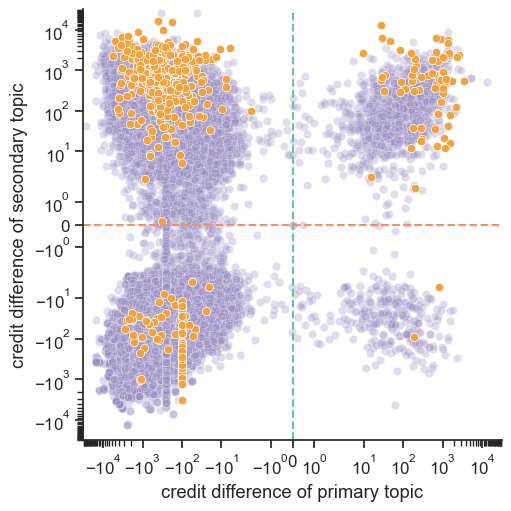

In [27]:
sns.set(style='ticks', font_scale=1.1, font='Arial')
fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True) #, constrained_layout=True

sns.scatterplot(data=main_asso_gap_all, x="main_gap", y="asso_gap",color='#998ec3',alpha=0.3,
               ax=ax)

# sns.scatterplot(data=main_asso_gap_behinder, x="main_gap", y="asso_gap",color='steelblue',alpha=0.3,
#                ax=ax)

sns.scatterplot(data=main_asso_gap_elites, x="main_gap", y="asso_gap",color='#f1a340',
               ax=ax)



ax.set_xscale('symlog')
ax.set_yscale('symlog')
# ax.set(xlim=[-1000,1000],ylim=[-1000,1000])
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(-10**4.5,10**4.5)
plt.ylim(-10**4.5,10**4.5)
ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.yaxis.set_minor_locator(MultipleLocator(1000))
ax.axvline(x=0,ls='--',color=type_colors['asso'])
ax.axhline(y=0,ls='--',color=type_colors['main'])
ax.set(xlabel='credit difference of primary topic',ylabel='credit difference of secondary topic')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig(f'result_data_plot/new_plot(202403)/credit differenc in topics({threshold}).png',dpi=600)

In [28]:
quadrant_1_all = main_asso_gap_all[(main_asso_gap_all.main_gap>=0)&(main_asso_gap_all.asso_gap>=0)]
quadrant_2_all = main_asso_gap_all[(main_asso_gap_all.main_gap<0)&(main_asso_gap_all.asso_gap>=0)]
quadrant_3_all = main_asso_gap_all[(main_asso_gap_all.main_gap<0)&(main_asso_gap_all.asso_gap<0)]
quadrant_4_all = main_asso_gap_all[(main_asso_gap_all.main_gap>=0)&(main_asso_gap_all.asso_gap<0)]

ratio_quadrant_1_all = len(quadrant_1_all)/len(main_asso_gap_all)
ratio_quadrant_2_all = len(quadrant_2_all)/len(main_asso_gap_all)
ratio_quadrant_3_all = len(quadrant_3_all)/len(main_asso_gap_all)
ratio_quadrant_4_all = len(quadrant_4_all)/len(main_asso_gap_all)
print(ratio_quadrant_1_all,ratio_quadrant_2_all,ratio_quadrant_3_all,ratio_quadrant_4_all)

0.02235366102386294 0.36816234958188865 0.603508056292066 0.005975933102182337


In [29]:
quadrant_1_elites = main_asso_gap_elites[(main_asso_gap_elites.main_gap>=0)&(main_asso_gap_elites.asso_gap>=0)]
quadrant_2_elites = main_asso_gap_elites[(main_asso_gap_elites.main_gap<0)&(main_asso_gap_elites.asso_gap>=0)]
quadrant_3_elites = main_asso_gap_elites[(main_asso_gap_elites.main_gap<0)&(main_asso_gap_elites.asso_gap<0)]
quadrant_4_elites = main_asso_gap_elites[(main_asso_gap_elites.main_gap>=0)&(main_asso_gap_elites.asso_gap<0)]

ratio_quadrant_1_elites = len(quadrant_1_elites)/len(main_asso_gap_elites)
ratio_quadrant_2_elites = len(quadrant_2_elites)/len(main_asso_gap_elites)
ratio_quadrant_3_elites = len(quadrant_3_elites)/len(main_asso_gap_elites)
ratio_quadrant_4_elites = len(quadrant_4_elites)/len(main_asso_gap_elites)
print(ratio_quadrant_1_elites,ratio_quadrant_2_elites,ratio_quadrant_3_elites,ratio_quadrant_4_elites)

0.1440501043841336 0.6722338204592901 0.17954070981210857 0.0041753653444676405


In [30]:
quadrant_1_behinder = main_asso_gap_behinder[(main_asso_gap_behinder.main_gap>=0)&(main_asso_gap_behinder.asso_gap>=0)]
quadrant_2_behinder = main_asso_gap_behinder[(main_asso_gap_behinder.main_gap<0)&(main_asso_gap_behinder.asso_gap>=0)]
quadrant_3_behinder = main_asso_gap_behinder[(main_asso_gap_behinder.main_gap<0)&(main_asso_gap_behinder.asso_gap<0)]
quadrant_4_behinder = main_asso_gap_behinder[(main_asso_gap_behinder.main_gap>=0)&(main_asso_gap_behinder.asso_gap<0)]

ratio_quadrant_1_behinder = len(quadrant_1_behinder)/len(main_asso_gap_behinder)
ratio_quadrant_2_behinder = len(quadrant_2_behinder)/len(main_asso_gap_behinder)
ratio_quadrant_3_behinder = len(quadrant_3_behinder)/len(main_asso_gap_behinder)
ratio_quadrant_4_behinder = len(quadrant_4_behinder)/len(main_asso_gap_behinder)
print(ratio_quadrant_1_behinder,ratio_quadrant_2_behinder,ratio_quadrant_3_behinder,ratio_quadrant_4_behinder)

0.005361538274072089 0.32805303048765627 0.6614675992493847 0.005117831988886994


In [31]:
quadrant_1 = [ratio_quadrant_1_behinder,ratio_quadrant_1_all,ratio_quadrant_1_elites]
quadrant_2 = [ratio_quadrant_2_behinder,ratio_quadrant_2_all,ratio_quadrant_2_elites]
quadrant_3 = [ratio_quadrant_3_behinder,ratio_quadrant_3_all,ratio_quadrant_3_elites]
quadrant_4 = [ratio_quadrant_4_behinder,ratio_quadrant_4_all,ratio_quadrant_4_elites]

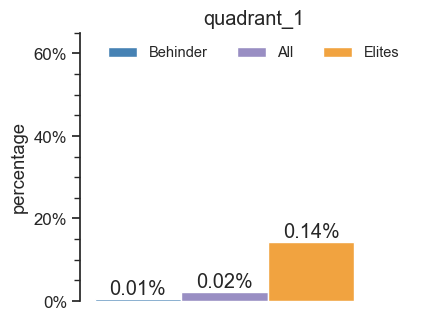

In [32]:
#with_new
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.85*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_q1 = np.array([0,0.3,0.6])
y_q1 = quadrant_1

p0 = ax.bar(x_q1[0], y_q1[0], width,color='steelblue',label='Behinder')
p1 = ax.bar(x_q1[1], y_q1[1], width,color='#998ec3',label='All')
p2 = ax.bar(x_q1[2], y_q1[2], width,color='#f1a340',label='Elites')



ax.bar_label(p0, label_type='edge',fmt='%.2f%%')
ax.bar_label(p1, label_type='edge',fmt='%.2f%%')
ax.bar_label(p2, label_type='edge',fmt='%.2f%%')

#fig ticks set
ax.legend(frameon=0,ncol=3,loc='upper center',fontsize=10.5)
ax.set_ylim([0,0.65])
ax.set_xlim([-0.2,1.0])
ax.set_ylabel('percentage')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.60], ['0%','10%','20%','30%','40%','50%','60%'])
ax.set_yticks([0,0.2,0.4,0.60], ['0%','20%','40%','60%'])
ax.set_xticks([])
ax.set_title(f'quadrant_1')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.savefig(f'result_data_plot/new_plot(202403)/partial surpass ({threshold}_quadrant_1).pdf')
plt.show()


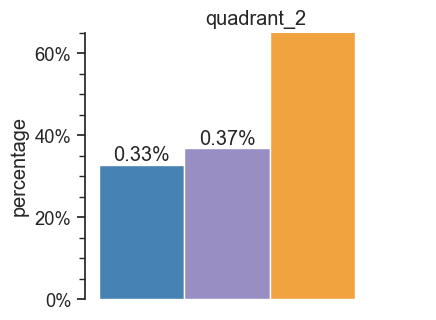

In [33]:
#with_new
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.85*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_q1 = np.array([0,0.3,0.6])
y_q1 = quadrant_2

p0 = ax.bar(x_q1[0], y_q1[0], width,color='steelblue',label='Behinder')
p1 = ax.bar(x_q1[1], y_q1[1], width,color='#998ec3',label='All')
p2 = ax.bar(x_q1[2], y_q1[2], width,color='#f1a340',label='Elites')



ax.bar_label(p0, label_type='edge',fmt='%.2f%%')
ax.bar_label(p1, label_type='edge',fmt='%.2f%%')
ax.bar_label(p2, label_type='edge',fmt='%.2f%%')

#fig ticks set
# ax.legend(frameon=0,ncol=3,loc='upper center',fontsize=10.5)
ax.set_ylim([0,0.65])
ax.set_xlim([-0.2,1.0])
ax.set_ylabel('percentage')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.60], ['0%','10%','20%','30%','40%','50%','60%'])
ax.set_yticks([0,0.2,0.4,0.60], ['0%','20%','40%','60%'])
ax.set_xticks([])
ax.set_title(f'quadrant_2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig(f'result_data_plot/new_plot(202403)/partial surpass ({threshold}_quadrant_2).pdf')
plt.show()

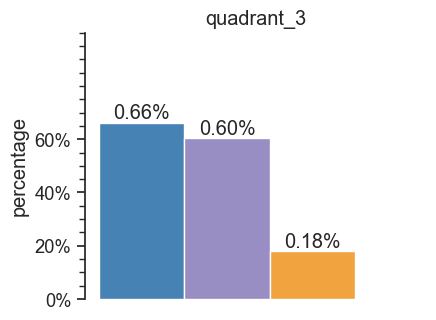

In [34]:
#with_new
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.85*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_q1 = np.array([0,0.3,0.6])
y_q1 = quadrant_3

p0 = ax.bar(x_q1[0], y_q1[0], width,color='steelblue',label='Behinder')
p1 = ax.bar(x_q1[1], y_q1[1], width,color='#998ec3',label='All')
p2 = ax.bar(x_q1[2], y_q1[2], width,color='#f1a340',label='Elites')



ax.bar_label(p0, label_type='edge',fmt='%.2f%%')
ax.bar_label(p1, label_type='edge',fmt='%.2f%%')
ax.bar_label(p2, label_type='edge',fmt='%.2f%%')
#fig ticks set
# ax.legend(frameon=0,ncol=3,loc='upper center',fontsize=10.5)
ax.set_ylim([0,1])
ax.set_xlim([-0.2,1])
ax.set_ylabel('percentage')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
# ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.60], ['0%','10%','20%','30%','40%','50%','60%'])
ax.set_yticks([0,0.2,0.4,0.60], ['0%','20%','40%','60%'])
ax.set_xticks([])
ax.set_title(f'quadrant_3')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig(f'result_data_plot/new_plot(202403)/partial surpass ({threshold}&quadrant_3).pdf')
plt.show()

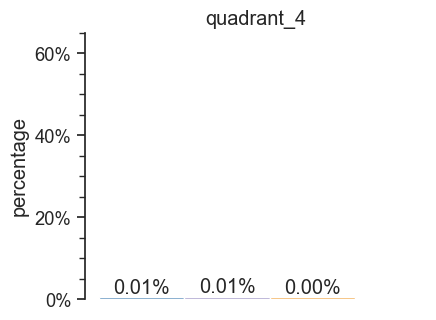

In [35]:
#with_new
width = 0.3  # the width of the bars: can also be len(x) sequence

#figure layout set
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.85*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#plot
x_q1 = np.array([0,0.3,0.6])
y_q1 = quadrant_4

p0 = ax.bar(x_q1[0], y_q1[0], width,color='steelblue',label='Behinder')
p1 = ax.bar(x_q1[1], y_q1[1], width,color='#998ec3',label='All')
p2 = ax.bar(x_q1[2], y_q1[2], width,color='#f1a340',label='Elites')



ax.bar_label(p0, label_type='edge',fmt='%.2f%%')
ax.bar_label(p1, label_type='edge',fmt='%.2f%%')
ax.bar_label(p2, label_type='edge',fmt='%.2f%%')

#fig ticks set
# ax.legend(frameon=0,ncol=3,loc='upper center',fontsize=10.5)
ax.set_ylim([0,0.65])
ax.set_xlim([-0.2,1])
ax.set_ylabel('percentage')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_yticks([0,0.2,0.4,0.60], ['0%','20%','40%','60%'])
ax.set_xticks([])
ax.set_title(f'quadrant_4')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.savefig(f'result_data_plot/new_plot(202403)/partial surpass ({threshold}&quadrant_4).pdf')
plt.show()